In [26]:
#%tensorflow_version 2.x
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.3.0


**Loading the Data**

In [27]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

online_data = pd.read_excel("/Users/haripriyakumar/Desktop/BAN676/Assignment 1/OnlineUse.xlsx","OnlineUseData")

online_data = online_data.reindex(
    np.random.permutation(online_data.index))
online_data.shape
online_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6857 entries, 6248 to 2575
Data columns (total 22 columns):
ClinicID                6857 non-null int64
OnlineAppointmentUse    6857 non-null float64
malepct                 6857 non-null float64
unemp                   6857 non-null float64
age16to24               6857 non-null float64
age25to34               6857 non-null float64
age35to44               6857 non-null float64
age45to54               6857 non-null float64
age55to64               6857 non-null float64
age65to74               6857 non-null float64
age75to84               6857 non-null float64
age85plus               6857 non-null float64
phoneeasy               6857 non-null float64
onlineasy               6857 non-null float64
race                    6857 non-null float64
longstdhealth           6857 non-null float64
canmngownhealth         6857 non-null float64
reducedability          6857 non-null float64
prefgpalways            6857 non-null float64
bcaaware          

**PreProcessing Data**

In [28]:
#Removing Outliers
online_data= online_data[online_data.OnlineAppointmentUse > 0]
online_data.unemp = online_data.where(online_data.unemp < 0, 0)
online_data.head()

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
6248,6254,0.2,0.5,0,0.0,0.2,0.3,0.2,0.1,0.1,...,0.7,0.7,0.6,0.5,0.8,0.7,0.5,0.6,EMIS,7012
4833,4839,0.0,0.4,0,0.1,0.1,0.1,0.2,0.1,0.1,...,0.9,0.9,0.9,0.6,0.8,0.6,0.5,0.3,EMIS,13813
369,375,0.3,0.5,0,0.1,0.2,0.2,0.2,0.2,0.1,...,0.8,1.0,0.9,0.5,0.7,0.9,0.5,0.6,EMIS,13430
3678,3684,0.2,0.5,0,0.1,0.3,0.3,0.1,0.1,0.1,...,0.9,0.8,0.3,0.4,0.9,0.6,0.8,0.5,EMIS,3936
1715,1721,0.1,0.6,0,0.1,0.1,0.1,0.1,0.2,0.2,...,0.8,0.7,1.0,0.6,0.8,0.6,0.5,0.2,EMIS,10525


In [29]:
online_data.columns

Index(['ClinicID', 'OnlineAppointmentUse', 'malepct', 'unemp', 'age16to24',
       'age25to34', 'age35to44', 'age45to54', 'age55to64', 'age65to74',
       'age75to84', 'age85plus', 'phoneeasy', 'onlineasy', 'race',
       'longstdhealth', 'canmngownhealth', 'reducedability', 'prefgpalways',
       'bcaaware', 'vendor', 'numpats'],
      dtype='object')

In [30]:
online_data['OnlineAppointmentUse'].value_counts() 

0.2    1
0.1    1
0.1    1
0.3    1
0.2    1
      ..
0.1    1
0.1    1
0.2    1
0.1    1
0.1    1
Name: OnlineAppointmentUse, Length: 6784, dtype: int64

In [31]:
# checking for null values 
print(online_data["OnlineAppointmentUse"].isnull().sum())

0


In [33]:
def preprocess_features(online_data):
    selected_features = pd.get_dummies(online_data, columns=['vendor'])
    selected_features = selected_features.loc[:, selected_features.columns != 'OnlineAppointmentUse']  
    processed_features = selected_features.copy() 
    return processed_features

def preprocess_targets(online_data): 
    output_targets = online_data["OnlineAppointmentUse"]
    return output_targets

**Splitting the Data**

In [34]:
# Choose examples for training.
training_examples = preprocess_features(online_data.head(5465))
training_targets = preprocess_targets(online_data.head(5465))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose examples for validation.
validation_examples = preprocess_features(online_data.tail(1392))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(online_data.tail(1392))
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


Training examples summary:


,ClinicID,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,reducedability,prefgpalways,bcaaware,numpats,vendor_EMIS,vendor_EMIS (I),vendor_MICROTEST,vendor_TPP,vendor_VISION,vendor_VISION (I)
count,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,...,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0
mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-4.3,-0.1,-1.8,-2.2,-2.7,-4.1,-3.6,-52.2,-15.1,...,-8.8,-5.7,-2.5,-1.4,-1.2,-0.1,-0.1,-0.8,-0.2,-0.0
25%,-0.9,-0.7,-0.1,-0.6,-0.7,-0.7,-0.6,-0.6,0.0,0.1,...,0.1,0.2,-0.7,-0.7,-1.2,-0.1,-0.1,-0.8,-0.2,-0.0
50%,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.0,0.1,0.0,0.1,...,0.1,0.2,-0.0,-0.2,0.9,-0.1,-0.1,-0.8,-0.2,-0.0
75%,0.9,0.6,-0.1,0.4,0.6,0.6,0.6,0.6,0.0,0.1,...,0.1,0.2,0.7,0.5,0.9,-0.1,-0.1,1.3,-0.2,-0.0
max,1.7,6.0,21.3,11.7,6.1,4.5,4.0,3.7,0.1,0.1,...,0.2,0.2,3.4,12.0,0.9,11.0,11.8,1.3,4.8,52.3


Validation examples summary:


,ClinicID,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,reducedability,prefgpalways,bcaaware,numpats,vendor_EMIS,vendor_EMIS (I),vendor_MICROTEST,vendor_TPP,vendor_VISION,vendor_VISION (I)
count,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,...,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0
mean,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.0,0.0,0.0
std,1.0,1.0,1.2,1.0,1.0,1.0,1.0,1.0,0.0,0.8,...,1.0,1.0,1.0,1.0,1.0,0.7,0.6,1.0,1.0,1.4
min,-1.7,-3.1,-0.1,-1.8,-2.1,-2.7,-4.1,-3.6,-0.0,-15.1,...,-8.8,-5.7,-2.3,-1.4,-1.2,-0.1,-0.1,-0.8,-0.2,-0.0
25%,-0.8,-0.6,-0.1,-0.6,-0.7,-0.7,-0.6,-0.6,0.0,0.1,...,0.1,0.2,-0.7,-0.7,-1.2,-0.1,-0.1,-0.8,-0.2,-0.0
50%,0.0,-0.0,-0.1,-0.1,-0.2,-0.1,0.1,0.0,0.0,0.1,...,0.1,0.2,0.0,-0.2,0.9,-0.1,-0.1,-0.8,-0.2,-0.0
75%,0.9,0.6,-0.1,0.4,0.5,0.6,0.7,0.7,0.0,0.1,...,0.1,0.2,0.7,0.5,0.9,-0.1,-0.1,1.3,-0.2,-0.0
max,1.7,4.7,22.4,13.5,7.0,4.1,3.4,3.4,0.1,0.1,...,0.2,0.2,2.8,9.6,0.9,11.0,11.8,1.3,4.8,52.3


Training targets summary:


count   5465.0
mean       0.1
std        0.1
min        0.0
25%        0.1
50%        0.1
75%        0.2
max        0.7
Name: OnlineAppointmentUse, dtype: float64

Validation targets summary:


count   1392.0
mean       0.1
std        0.1
min        0.0
25%        0.1
50%        0.1
75%        0.2
max        0.7
Name: OnlineAppointmentUse, dtype: float64

In [18]:
#first 5 rows of the training data
training_examples.head()

,ClinicID,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,reducedability,prefgpalways,bcaaware,numpats,vendor_EMIS,vendor_EMIS (I),vendor_MICROTEST,vendor_TPP,vendor_VISION,vendor_VISION (I)
6550,1.6,0.0,-0.1,-0.5,-0.3,-0.7,1.3,0.0,0.0,0.1,...,0.1,0.2,1.3,-0.5,0.9,-0.1,-0.1,-0.8,-0.2,-0.0
3174,-0.1,-1.0,-0.1,0.0,1.0,0.7,-0.2,-1.8,0.0,0.1,...,0.1,0.2,1.1,-0.9,0.9,-0.1,-0.1,-0.8,-0.2,-0.0
4033,0.3,-0.8,-0.1,8.5,0.1,-1.0,-4.1,-1.8,-0.0,0.1,...,0.1,0.2,-1.0,2.3,-1.2,-0.1,-0.1,1.3,-0.2,-0.0
1387,-1.0,0.0,-0.1,-1.3,-0.4,-0.3,1.7,0.6,0.0,0.1,...,0.1,0.2,1.1,-0.1,0.9,-0.1,-0.1,-0.8,-0.2,-0.0
3712,0.1,2.2,-0.1,1.3,-1.3,0.0,-0.7,0.3,0.0,0.1,...,0.1,0.2,-0.1,-1.0,0.9,-0.1,-0.1,-0.8,-0.2,-0.0


**Updating missing data**

In [35]:
training_examples[training_examples < 0] = 0
display.display(training_examples.describe())

validation_examples[validation_examples < 0] = 0
display.display(validation_examples.describe())

,ClinicID,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,reducedability,prefgpalways,bcaaware,numpats,vendor_EMIS,vendor_EMIS (I),vendor_MICROTEST,vendor_TPP,vendor_VISION,vendor_VISION (I)
count,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,...,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0,5465.0
mean,0.4,0.4,0.1,0.3,0.4,0.4,0.4,0.4,0.0,0.1,...,0.1,0.2,0.4,0.4,0.5,0.1,0.1,0.5,0.2,0.0
std,0.6,0.6,1.0,0.8,0.7,0.6,0.6,0.6,0.0,0.0,...,0.0,0.0,0.6,0.8,0.4,1.0,1.0,0.6,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,...,0.1,0.2,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0
75%,0.9,0.6,0.0,0.4,0.6,0.6,0.6,0.6,0.0,0.1,...,0.1,0.2,0.7,0.5,0.9,0.0,0.0,1.3,0.0,0.0
max,1.7,6.0,21.3,11.7,6.1,4.5,4.0,3.7,0.1,0.1,...,0.2,0.2,3.4,12.0,0.9,11.0,11.8,1.3,4.8,52.3


,ClinicID,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,reducedability,prefgpalways,bcaaware,numpats,vendor_EMIS,vendor_EMIS (I),vendor_MICROTEST,vendor_TPP,vendor_VISION,vendor_VISION (I)
count,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,...,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0,1392.0
mean,0.4,0.4,0.1,0.3,0.4,0.4,0.4,0.4,0.0,0.1,...,0.1,0.2,0.4,0.4,0.5,0.0,0.0,0.5,0.2,0.0
std,0.6,0.6,1.2,0.7,0.7,0.7,0.6,0.6,0.0,0.0,...,0.0,0.0,0.6,0.8,0.4,0.7,0.6,0.6,1.0,1.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,...,0.1,0.2,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0
75%,0.9,0.6,0.0,0.4,0.5,0.6,0.7,0.7,0.0,0.1,...,0.1,0.2,0.7,0.5,0.9,0.0,0.0,1.3,0.0,0.0
max,1.7,4.7,22.4,13.5,7.0,4.1,3.4,3.4,0.1,0.1,...,0.2,0.2,2.8,9.6,0.9,11.0,11.8,1.3,4.8,52.3


In [36]:
#Shape of the training data
training_examples.shape

(5465, 26)

**Buidling Models**


**Navie Model**

In [37]:
# To calculate the base accuracy of the whole dataset 
#model 1
display.display(online_data.describe())

,ClinicID,OnlineAppointmentUse,malepct,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,numpats
count,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0,6784.0
mean,3429.7,0.1,0.5,0.1,0.2,0.2,0.2,0.2,0.1,-0.3,-2.0,0.7,0.8,0.7,0.5,-0.4,-0.6,-2.4,0.4,8646.6
std,1977.7,0.1,0.1,0.1,0.1,0.1,0.0,0.0,1.7,6.3,13.9,0.2,0.1,1.7,1.2,11.0,10.9,16.6,0.2,5478.7
min,1.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,-98.0,-98.0,-98.0,0.1,0.0,-98.0,-97.0,-97.0,-97.0,-97.0,0.0,809.0
25%,1718.8,0.1,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.6,0.7,0.6,0.5,0.8,0.5,0.3,0.3,4857.0
50%,3428.5,0.1,0.5,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0.7,0.8,0.9,0.5,0.8,0.6,0.5,0.4,7601.0
75%,5141.2,0.2,0.5,0.1,0.2,0.2,0.2,0.2,0.2,0.1,0.0,0.9,0.9,0.9,0.6,0.9,0.7,0.6,0.5,11134.5
max,6862.0,0.7,0.8,0.9,0.7,0.4,0.4,0.3,0.3,0.2,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,73488.0


In [38]:
online_data["OnlineAppointmentUse"].mean() # shows the mean(minimum accuracy) of the dataset

0.1379637961886789

**Baseline Model**

In [39]:
#Model 2 with 3 hidden layer and 1 output layer with metrics = MAE
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(25, activation=tf.nn.relu,),
    keras.layers.Dense(25, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.softplus)

  ])

model.compile(loss='mse',
              optimizer="rmsprop",
              metrics=['mae'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                864       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                825       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 2,365
Trainable params: 2,365
Non-trainable params: 0
_________________________________________________________________


In [40]:
# to fit the model 
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
EPOCHS = 300 
b_history = model.fit(training_examples, training_targets, epochs=EPOCHS,                   
validation_data= (validation_examples, validation_targets), verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [41]:
#Calculating the validation error for Model 2
print(min(b_history.history['val_mae'])) 

0.044565148651599884


**Plotting the Graph**

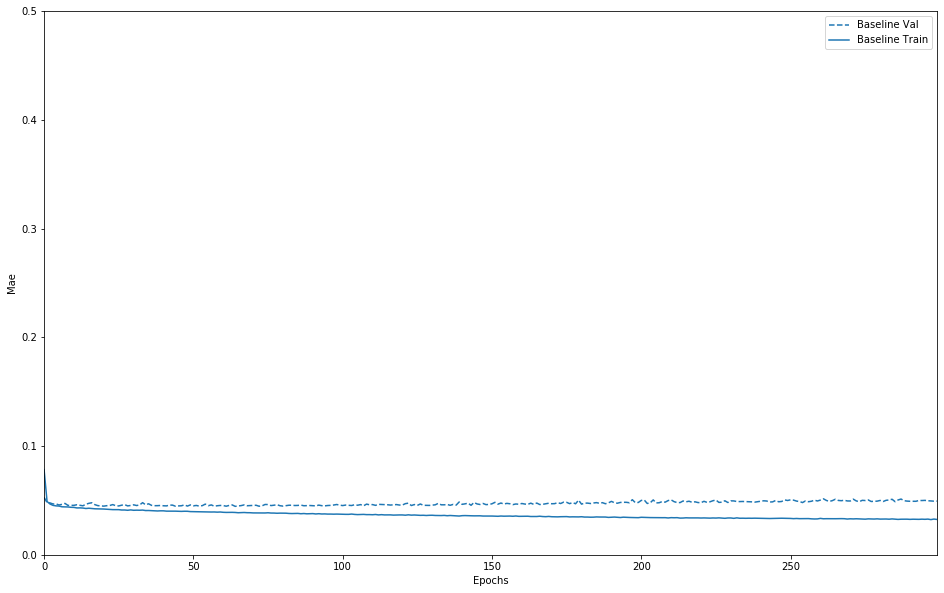

In [42]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mae'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,0.5])

plot_history([('baseline', b_history)])

**ANALYSIS**

Model 1 is the Naïve model thats shows the accuracy of the online data using its mean. 
Model 2 is the NN model with 3 hidden layers and 1 output layer using the softmanx as its activation function.
we can see that the mean absolute error of  naive model is 0.13 and that of model 2 is 0.04

A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap. we can conclude that the NN model is performing better and also has small generalization gap.


